# Data Exploration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from yellowbrick.regressor import ResidualsPlot,AlphaSelection
from sklearn.feature_selection import RFE


In [ ]:
df = pd.read_csv('HousingData.csv')

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.rename(columns = {'MEDV':'PRICE'}, inplace = True)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
columnss = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.shape

(506, 14)

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df['PRICE'].median()

21.2

In [ ]:
df["CRIM"].fillna(df["CRIM"].median(),inplace=True)
df["ZN"].fillna(df["ZN"].median(),inplace=True)
df["INDUS"].fillna(df["INDUS"].median(),inplace=True)
df["CHAS"].fillna(df["CHAS"].mean(),inplace=True)
df["AGE"].fillna(df["AGE"].median(),inplace=True)
df["LSTAT"].fillna(df["LSTAT"].mean(),inplace=True)

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Text(0.5, 0, 'CRIM')

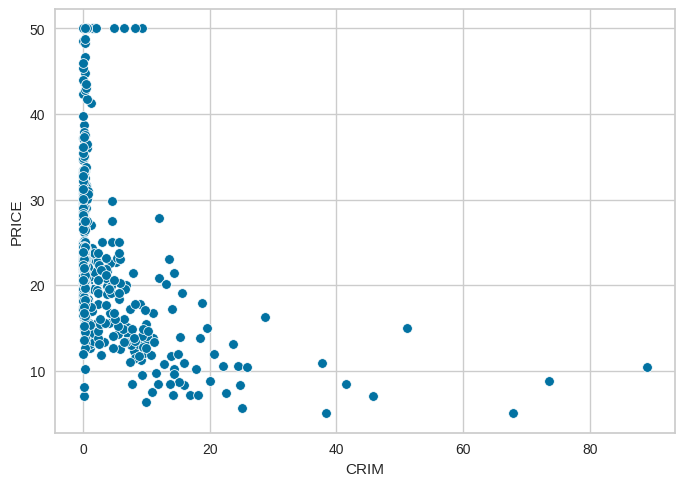

In [ ]:
sns.scatterplot(data=df,y='PRICE',x='CRIM')
plt.ylabel("PRICE")
plt.xlabel("CRIM")

Text(0.5, 0, 'RM')

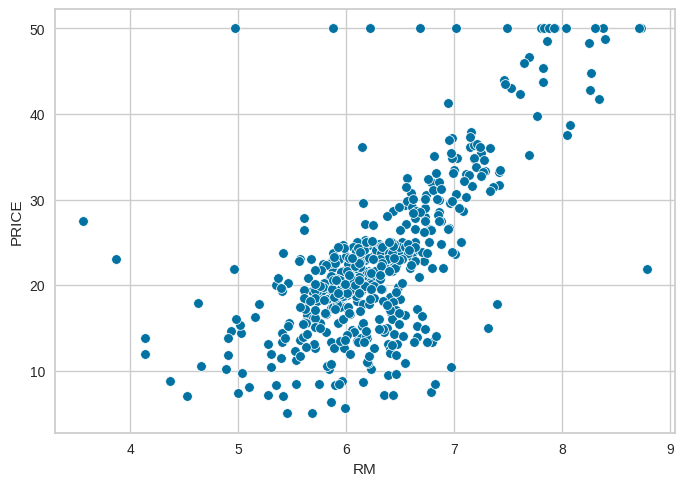

In [ ]:
sns.scatterplot(data=df,y='PRICE',x='RM')#RM   =    average number of rooms per dwelling
plt.ylabel("PRICE")
plt.xlabel("RM")

Text(0.5, 0, 'RM')

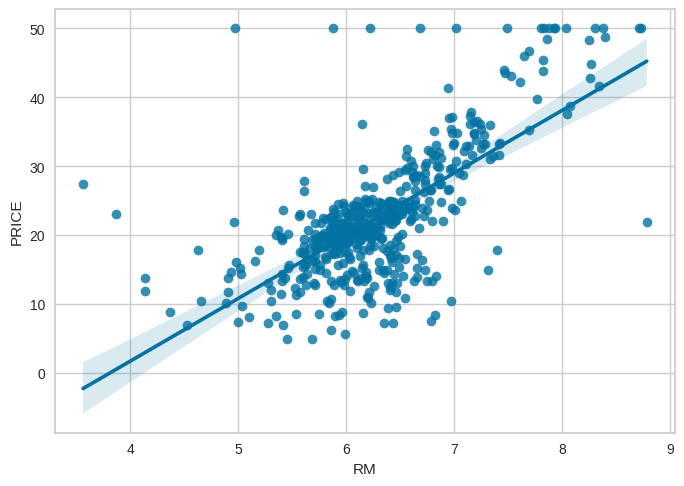

In [ ]:
sns.regplot(data=df,y='PRICE',x='RM')#RM   =    average number of rooms per dwelling
plt.ylabel("PRICE")
plt.xlabel("RM")

Text(0.5, 0, 'LSTAT')

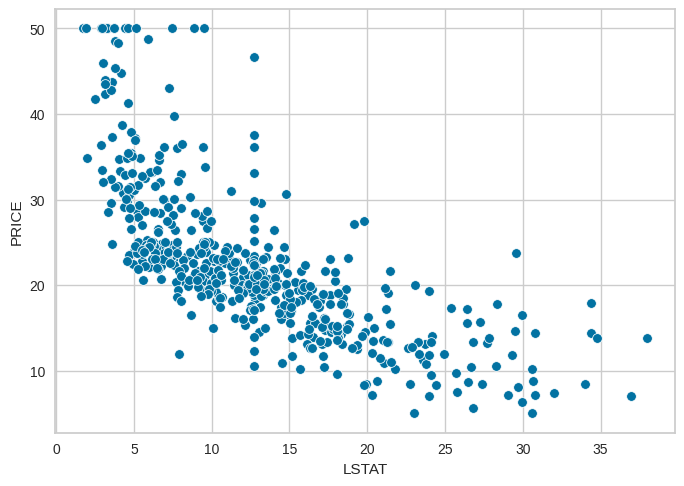

In [ ]:
sns.scatterplot(data=df,y='PRICE',x='LSTAT')  #LSTAT    % lower status of the population
plt.ylabel("PRICE")
plt.xlabel("LSTAT")

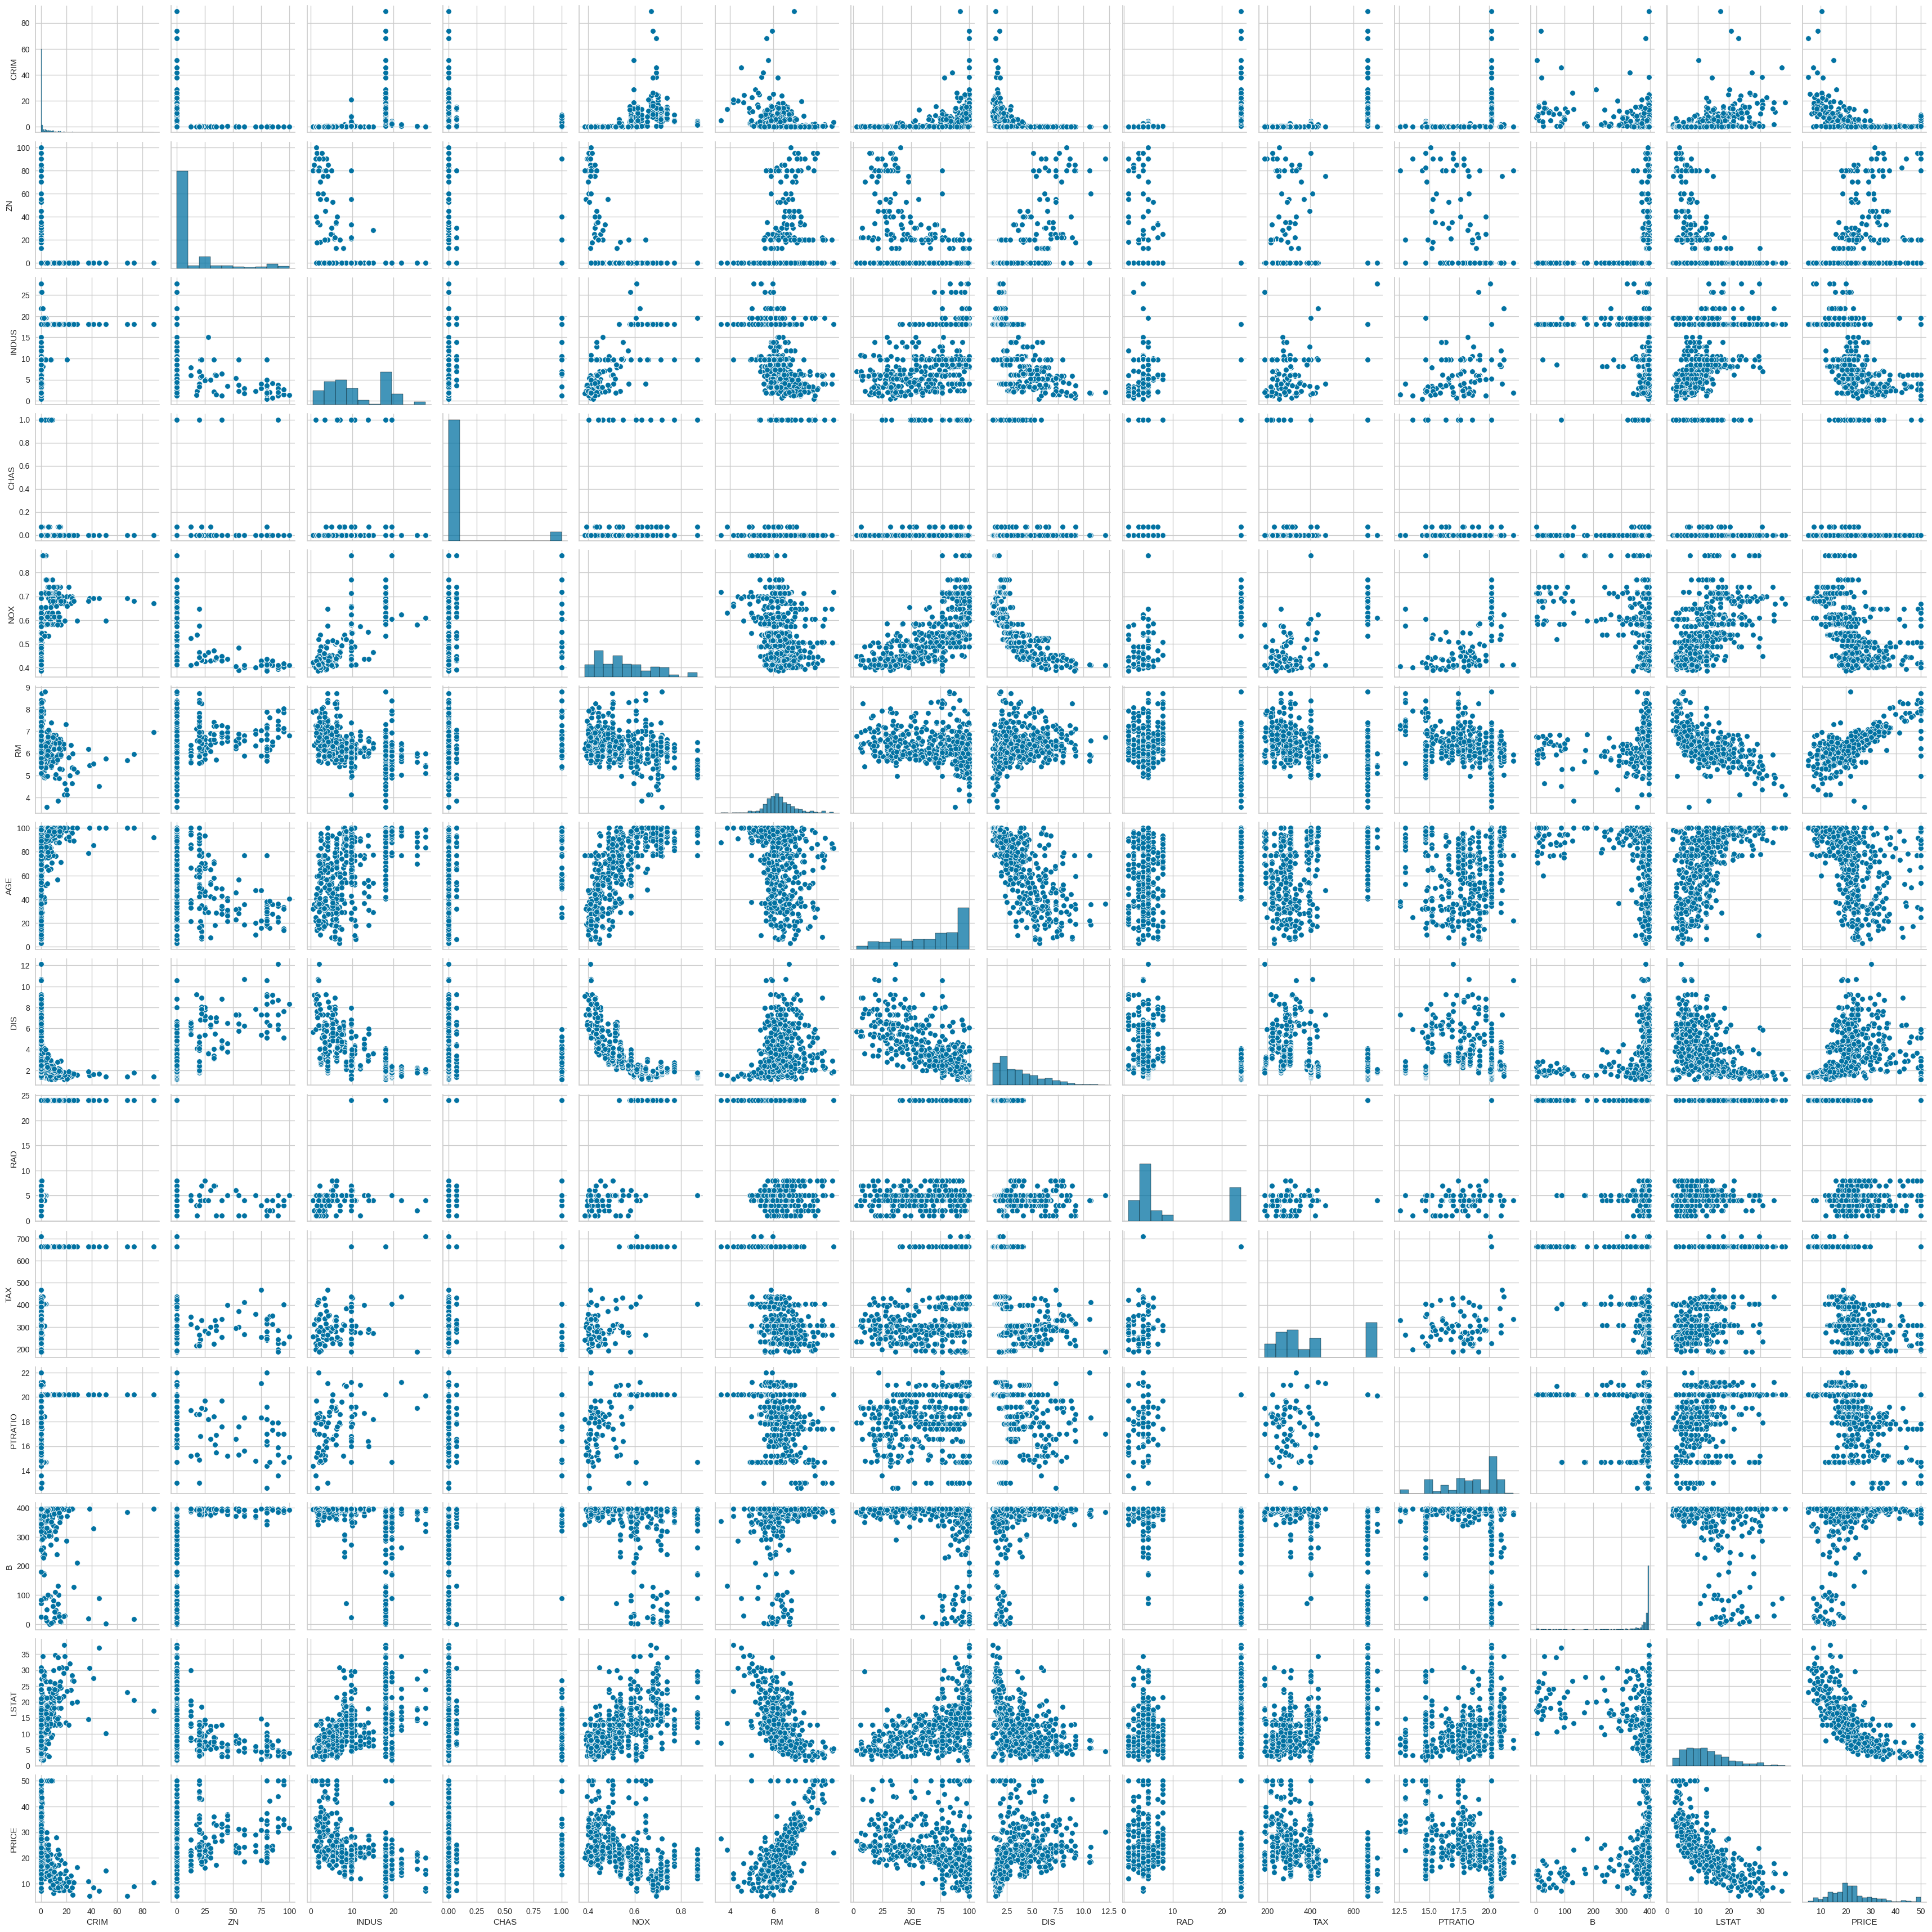

In [ ]:
sns.pairplot(df)

In [ ]:
corr = df.corr()

<Axes: >

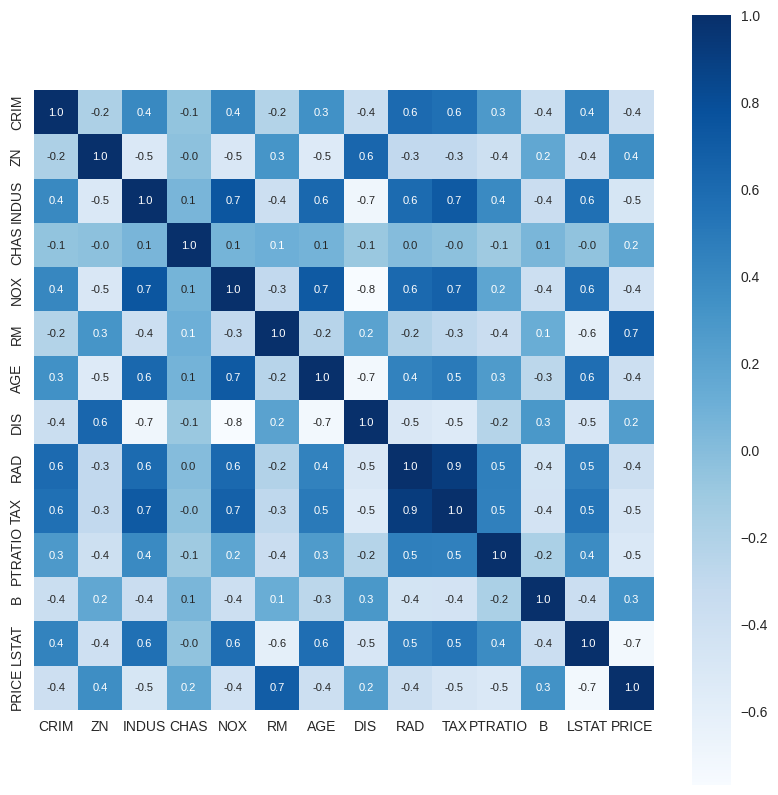

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

## Creating Independent and Dependent Variables

In [ ]:
X = df.drop('PRICE', axis=1)
Y = df['PRICE']
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


## Scaling Data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X_ = scaler.transform(X)
X = pd.DataFrame(data=X_, columns = X.columns)

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.303130


## Splitting Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=68)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(354, 13) (354,)
(152, 13) (152,)


## Simple Regression

In [ ]:
simple_reg_model = LinearRegression()
simple_reg_model.fit(X_train[['RM']], y_train)

LinearRegression()

In [ ]:
srm_y_pred = simple_reg_model.predict(X_test[['RM']])

In [ ]:
srm_y_pred_train =  simple_reg_model.predict(X_train[['RM']])

Mean Squared Error (Closed Form): 40.351449697873015
Mean Squared Error (Gradient Descent): 49.08657647757313


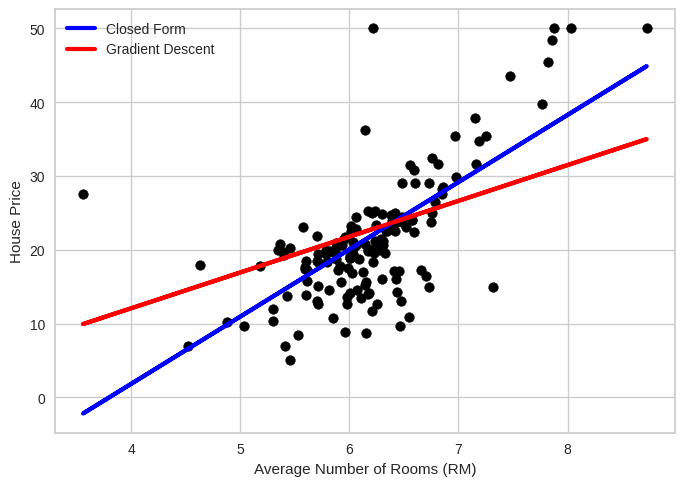

In [ ]:
# Selecting 'RM' as the input feature
X = df[['RM']]
y = df['PRICE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X_train_closed_form = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta_closed_form = np.linalg.inv(X_train_closed_form.T.dot(X_train_closed_form)).dot(X_train_closed_form.T).dot(y_train)

# Predictions on the test set using closed-form solution
X_test_closed_form = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred_closed_form = X_test_closed_form.dot(theta_closed_form)

# Model 2: Simple Linear Regression using gradient descent
alpha = 0.01  # learning rate
n_iterations = 1000
theta_gradient_descent = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/X_train.shape[0] * X_train_closed_form.T.dot(X_train_closed_form.dot(theta_gradient_descent) - y_train.values.reshape(-1, 1))
    theta_gradient_descent = theta_gradient_descent - alpha * gradients

# Predictions on the test set using gradient descent
y_pred_gradient_descent = X_test_closed_form.dot(theta_gradient_descent)

# Evaluate the models
mse_closed_form = mean_squared_error(y_test, y_pred_closed_form)
mse_gradient_descent = mean_squared_error(y_test, y_pred_gradient_descent)

print(f'Mean Squared Error (Closed Form): {mse_closed_form}')
print(f'Mean Squared Error (Gradient Descent): {mse_gradient_descent}')

# Plot the regression line
plt.scatter(X_test['RM'], y_test, color='black')
plt.plot(X_test['RM'], y_pred_closed_form, color='blue', linewidth=3, label='Closed Form')
plt.plot(X_test['RM'], y_pred_gradient_descent, color='red', linewidth=3, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('House Price')
plt.legend()
plt.show()


In [ ]:
srm_r2score_test = r2_score(y_test,srm_y_pred)
print('Test R2_score is: ', srm_r2score_test*100)

srm_r2score_train = r2_score(y_train,srm_y_pred_train)
print('Train R2_score is: ', srm_r2score_train*100)

Test R2_score is:  -95.13353390108092
Train R2_score is:  -53.58860687908027


In [ ]:
srm_cross_test_score = cross_val_score(simple_reg_model,X_test[['RM']],y_test,cv=10)
srm_cross_test_score

array([ 0.63051904,  0.60071783,  0.5320655 ,  0.68696645,  0.3165369 ,
        0.58287317, -1.15801732,  0.46563885,  0.62869657,  0.69694024])

In [ ]:

print('The Cross Val is:', np.mean(srm_cross_test_score )*100)

The Cross Val is: 39.829372059828806


### ResidualsPlot

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


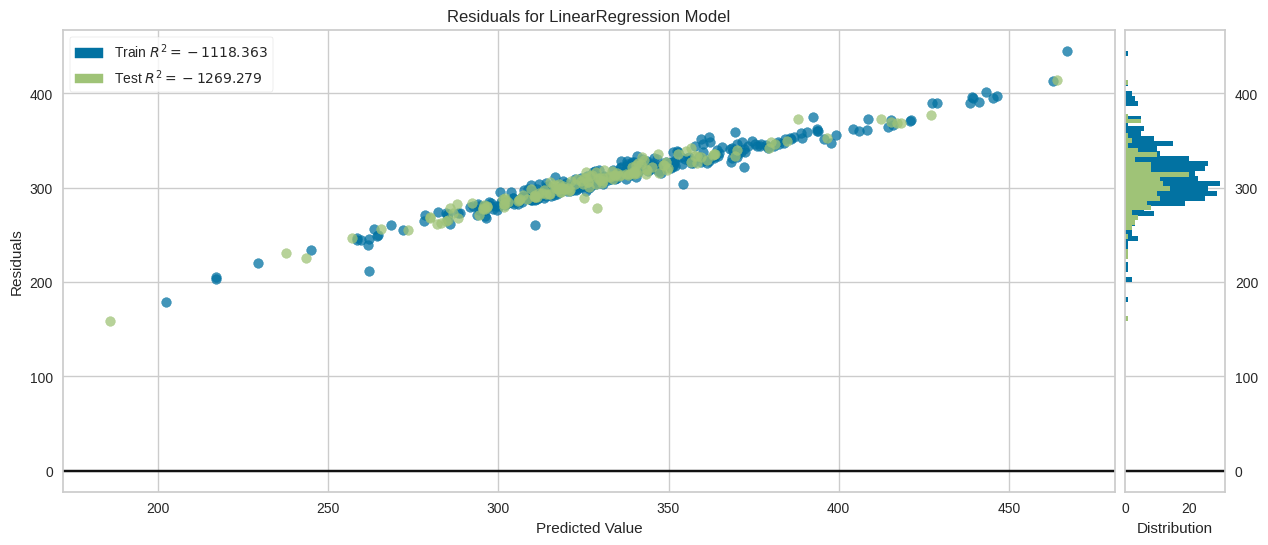

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
plt.figure(figsize=(15,6))
visualizer = ResidualsPlot(simple_reg_model,hist=True)
visualizer.fit(X_train[['RM']].values, y_train.values)
visualizer.score(X_test[['RM']].values, y_test.values)
visualizer.poof()

## Polynomial Regression

Text(0.5, 0, 'RM')

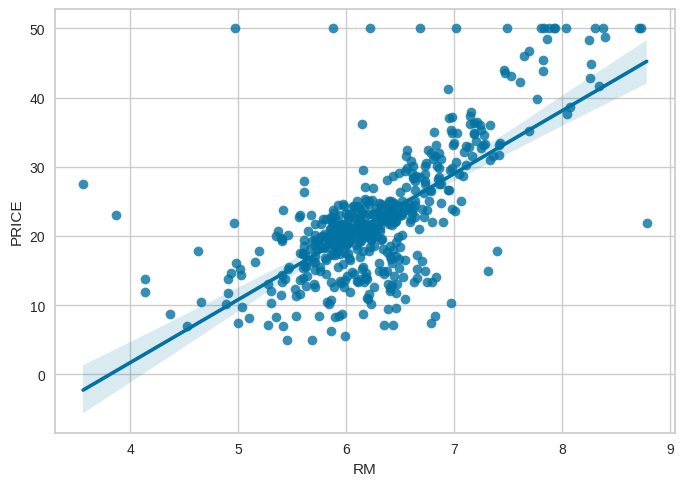

In [ ]:
sns.regplot(data=df,y='PRICE',x='RM')#RM   =    average number of rooms per dwelling
plt.ylabel("PRICE")
plt.xlabel("RM")

In [ ]:
poly_features = PolynomialFeatures(degree=3)

In [ ]:
X_train_poly = poly_features.fit_transform(X_train[['RM']])
X_test_poly = poly_features.fit_transform(X_test[['RM']])

In [ ]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_test_predict = poly_model.predict(X_test_poly)
y_train_predict = poly_model.predict(X_train_poly)

In [ ]:
poly_mse_test = mean_squared_error(y_test,y_test_predict)
print('The Test Mean Square Error is: ',poly_mse_test)

poly_mse_train = mean_squared_error(y_train,y_train_predict)
print('The Train Mean Square Error is: ',poly_mse_train)

The Test Mean Square Error is:  31.01237289896351
The Train Mean Square Error is:  39.714826751592035


In [ ]:
poly_r2score = r2_score(y_test,y_test_predict)
print('Test R2_score is: ', poly_r2score*100)

poly_r2score = r2_score(y_train,y_train_predict)
print('Train R2_score is: ', poly_r2score*100)

Test R2_score is:  58.37996977227012
Train R2_score is:  54.81638806841451


In [ ]:
poly_cross_test_score = cross_val_score(poly_model,X_test[['RM']],y_test,cv=10)
poly_cross_test_score

array([ 0.63051904,  0.60071783,  0.5320655 ,  0.68696645,  0.3165369 ,
        0.58287317, -1.15801732,  0.46563885,  0.62869657,  0.69694024])

In [ ]:
print('The Cross Val Score is: ',np.mean(poly_cross_test_score)*100 )

The Cross Val Score is:  39.829372059828806


## Multiple Regression

In [ ]:
def forward_selection(X, y, feature_names, max_features):
    selected_features = []
    remaining_features = set(feature_names)

    for _ in range(max_features):
        best_mse = float('inf')
        best_feature = None

        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_current = X[current_features]

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X_current, y, test_size=0.3, random_state=42)

            # Fit a linear regression model
            model = LinearRegression()
            model.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred = model.predict(X_test)

            # Calculate Mean Squared Error
            mse = mean_squared_error(y_test, y_pred)

            # Update the best feature if the MSE improves
            if mse < best_mse:
                best_mse = mse
                best_feature = feature

        # Add the best feature to the selected features
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

    return selected_features

# Load the Boston Housing dataset

X = df.drop('PRICE', axis=1)
Y = df['PRICE']

# Set the maximum number of features to select
max_features = 5

# Get the names of the selected features
selected_features = forward_selection(X, Y, X.columns.tolist(), max_features)
print(f'Selected Features: {selected_features}')

Selected Features: ['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX']


In [ ]:
lrm = LinearRegression()

In [ ]:
xtrain_new = X_train[list(selected_features)]
xtest_new = X_test[list(selected_features)]
print(xtrain_new.shape)
print(xtest_new.shape)

(354, 5)
(152, 5)


In [ ]:
xtrain_new.head()

,LSTAT,PTRATIO,DIS,ZN,NOX
405,0.586369,0.808511,0.026898,0.0,0.633745
43,0.157561,0.563830,0.417509,0.0,0.129630
481,0.165839,0.808511,0.200247,0.0,0.302469
113,0.423841,0.553191,0.128982,0.0,0.333333
124,0.437362,0.691489,0.079722,0.0,0.403292


In [ ]:
print(y_train.shape)
print(y_test.shape)

(354,)
(152,)


In [ ]:
lm2 = LinearRegression()
lm2.fit(xtrain_new, y_train)

LinearRegression()

In [ ]:
pred_new_test=lm2.predict(xtest_new)
pred_new_train=lm2.predict(xtrain_new)

In [ ]:
mr_mse_test = mean_squared_error(y_test,pred_new_test)
print('The Test mean Square Error is: ',mr_mse_test)

mr_mse_train = mean_squared_error(y_train,pred_new_train)
print('The Train mean Square Error is: ',mr_mse_train)

The Test mean Square Error is:  77.88691952566016
The Train mean Square Error is:  87.50882576962682


In [ ]:
print("The Test R-squared value is: {0:0.4f} \n".format(r2_score(y_test, pred_new_test)))
print("The Train R-squared value is: {0:0.4f} \n".format(r2_score(y_train, pred_new_train)))

The Test R-squared value is: -0.0453 

The Train R-squared value is: 0.0044 



In [ ]:
mr_cross_test_score = cross_val_score(lm2,X_test,y_test,cv=10)
mr_cross_test_score

array([ 0.63051904,  0.60071783,  0.5320655 ,  0.68696645,  0.3165369 ,
        0.58287317, -1.15801732,  0.46563885,  0.62869657,  0.69694024])

In [ ]:
print('The Cross Val Score is:', np.mean(mr_cross_test_score)*100)

The Cross Val Score is: 39.829372059828806


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


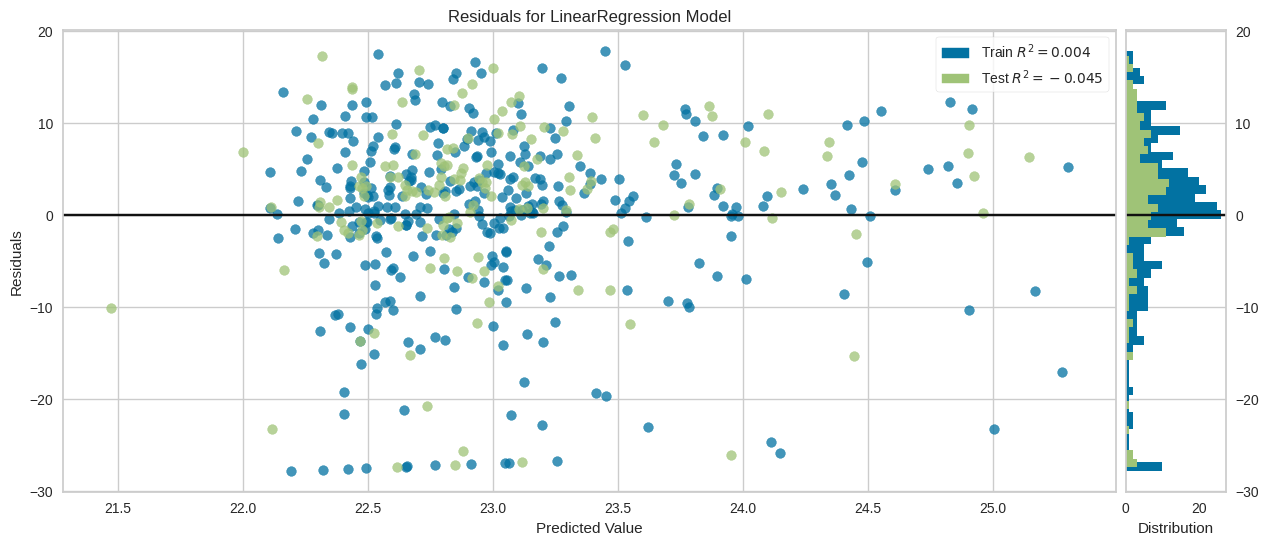

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
plt.figure(figsize=(15,6))
visualizer = ResidualsPlot(lm2,hist=True)
visualizer.fit(xtrain_new.values, y_train.values)
visualizer.score(xtest_new.values, y_test.values)
visualizer.poof()

## Ridge Regression

In [ ]:
X = df.drop('PRICE', axis=1)
Y = df['PRICE']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.30, random_state=68)

In [ ]:
ridge_regression = Ridge(alpha=1)
ridge_regression

Ridge(alpha=1)

In [ ]:
ridge_regression.fit(X_train, y_train)
y_pred_test = ridge_regression.predict(X_test)
y_pred_train = ridge_regression.predict(X_train)

In [ ]:
rr_mse_test = mean_squared_error(y_test, y_pred_test)
rr_mse_train = mean_squared_error(y_train, y_pred_train)

In [ ]:
print('Test Mean Squared Error is:', rr_mse_test)
print('Train Mean Squared Error is:', rr_mse_train)

Test Mean Squared Error is: 34.63976525987996
Train Mean Squared Error is: 19.109841493494155


In [ ]:
print('Test  R2 Score is: ', r2_score(y_test, y_pred_test))
print('Train R2 Score is: ', r2_score(y_train, y_pred_train))

Test  R2 Score is:  0.5892663863181437
Train R2 Score is:  0.7736910267202185


In [ ]:
rr_cross_test_score = cross_val_score(ridge_regression,X_test,y_test,cv=10)
rr_cross_test_score

array([0.56572724, 0.64859366, 0.74164988, 0.1689304 , 0.50123344,
       0.24408047, 0.78824657, 0.61587164, 0.75883098, 0.5123242 ])

In [ ]:
print('The Cross Val Score is: ', np.mean(rr_cross_test_score)*100)

The Cross Val Score is:  55.454884889648014


## Residual Plot

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


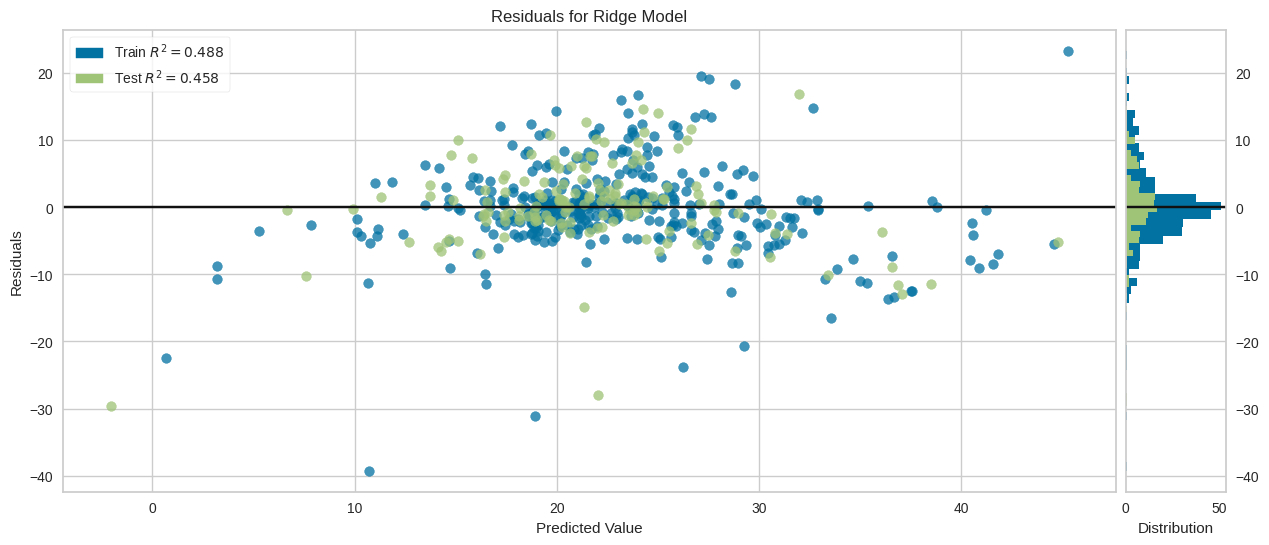

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
plt.figure(figsize=(15,6))
visualizer = ResidualsPlot(ridge_regression,hist=True)
visualizer.fit(X_train.values, y_train.values)
visualizer.score(X_test.values, y_test.values)
visualizer.poof()

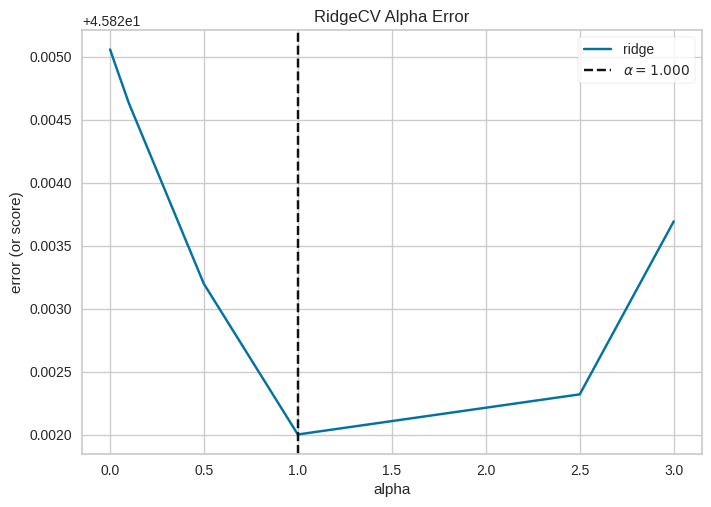

In [ ]:
# Create a list of alphas to cross-validate against
alphas =  [0.001, 0.01, 0.1, 0.5, 1.0, 2.5, 3.0]

# Instantiate the linear model and visualizer
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(X_train, y_train)
g = visualizer.poof()

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [ ]:
pred_value = ridge_regression.predict(X)

In [ ]:
df['Predicted Price'] = ''

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Predicted Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0,
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6,
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7,
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4,
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2,


In [ ]:
df['Predicted Price'] = pred_value

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Predicted Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0,30.256600
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6,24.390193
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7,31.405827
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4,29.839643
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2,25.810947


In [469]:
submission = df.copy()

In [470]:
submission.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Predicted Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0,30.256600
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6,24.390193
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7,31.405827
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4,29.839643
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2,25.810947


In [472]:
submission.to_csv('Ehsan fazal 500664068.csv', index=False)